IMPORTING LIBRARIES

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 32.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2012-05-29,20.389286,20.500000,20.189644,20.438213,17.475037,380508800,APPLE
2012-05-30,20.328571,20.713928,20.234285,20.684643,17.685734,529429600,APPLE
2012-05-31,20.740713,20.767857,20.409286,20.633215,17.641764,491674400,APPLE
2012-06-01,20.327143,20.451786,20.018572,20.035357,17.130585,520987600,APPLE
2012-06-04,20.053572,20.267857,19.589287,20.153214,17.231350,556995600,APPLE
...,...,...,...,...,...,...,...
2022-05-20,2191.370117,2197.959961,2100.189941,2151.820068,2151.820068,4968200,AMAZON
2022-05-23,2169.219971,2176.379883,2079.000000,2151.139893,2151.139893,5389900,AMAZON
2022-05-24,2080.500000,2108.000000,2025.199951,2082.000000,2082.000000,5146700,AMAZON


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10068 entries, 2012-05-29 to 2022-05-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10068 non-null  float64
 1   High          10068 non-null  float64
 2   Low           10068 non-null  float64
 3   Close         10068 non-null  float64
 4   Adj Close     10068 non-null  float64
 5   Volume        10068 non-null  int64  
 6   company_name  10068 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 629.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,1.006800e+04
mean,650.193743,656.844672,643.019839,650.070100,648.557625,5.875737e+07
std,864.471246,873.899024,854.026607,863.921845,864.935583,1.102988e+08
min,13.856071,14.271429,13.753571,13.947500,12.101385,7.922000e+03
25%,48.678750,49.049999,48.198126,48.675000,45.868320,2.647400e+06
50%,267.380005,270.304993,264.529999,267.345001,267.230011,1.334925e+07
75%,929.014999,933.449997,923.030029,928.785019,928.785019,6.583800e+07
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.460852e+09


EDA 

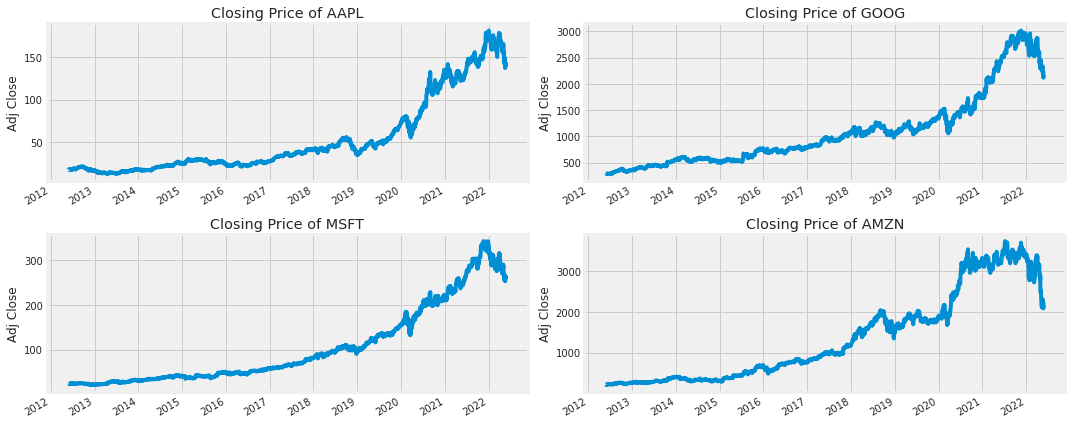

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

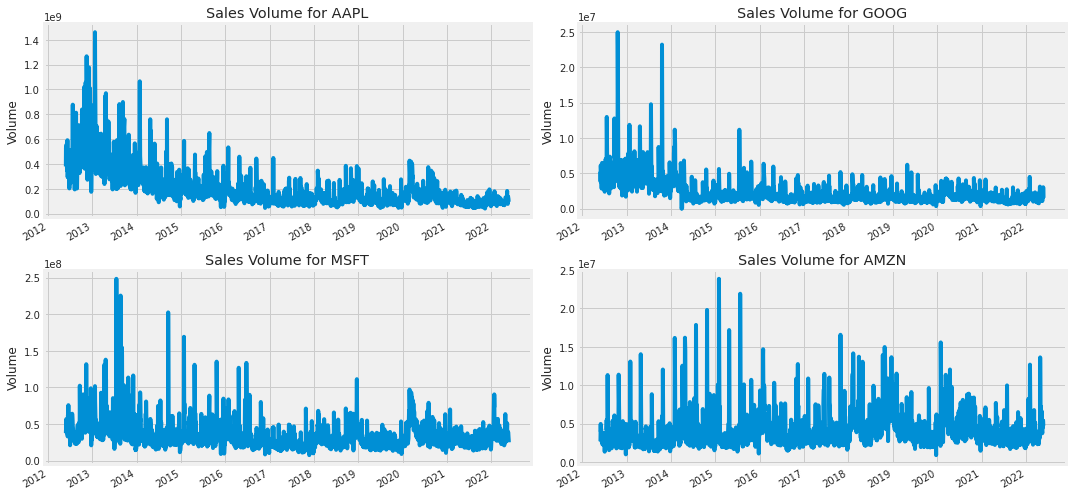

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()    

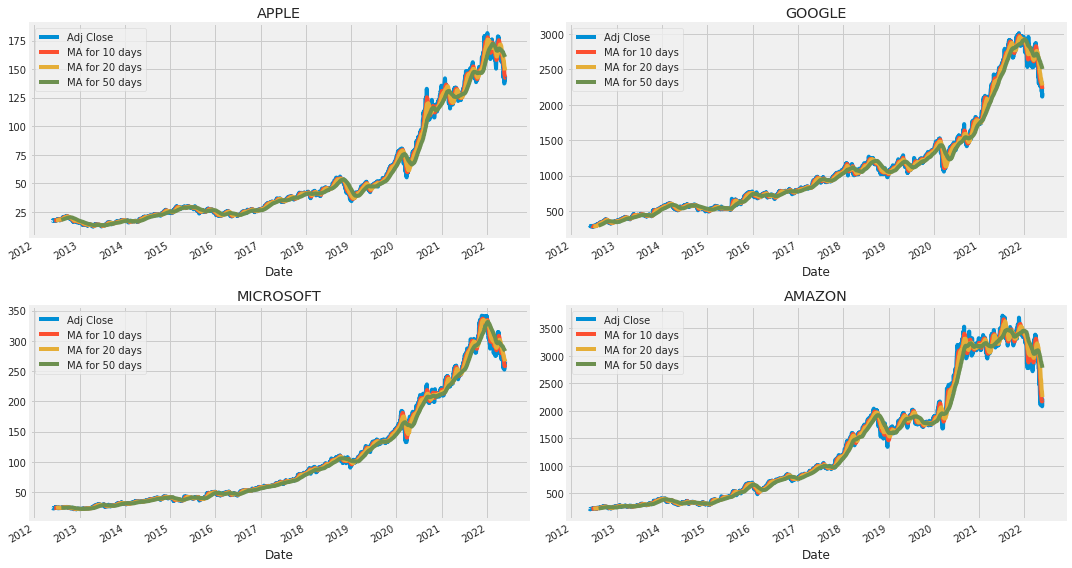

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

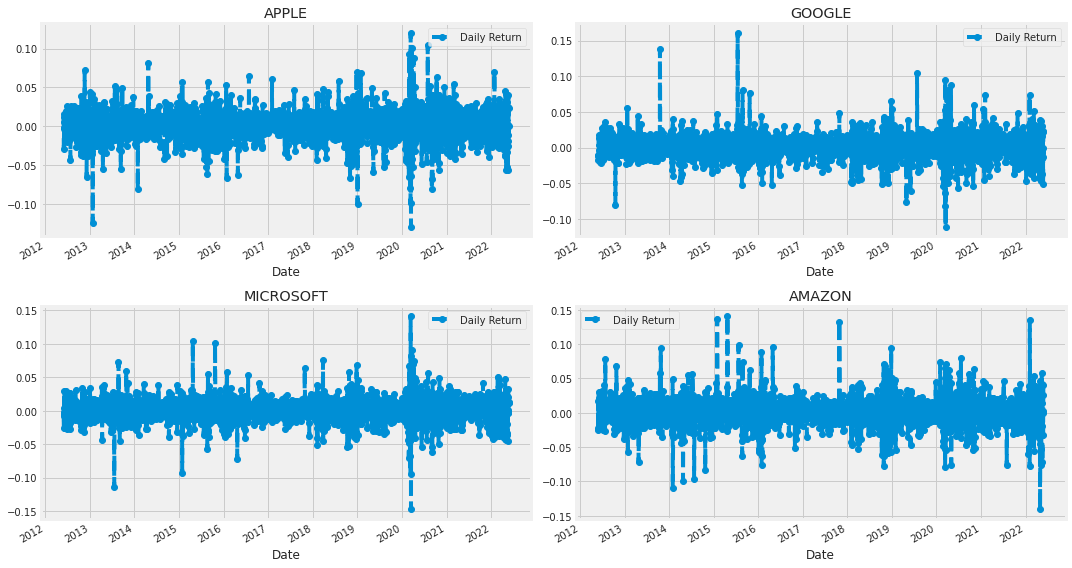

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

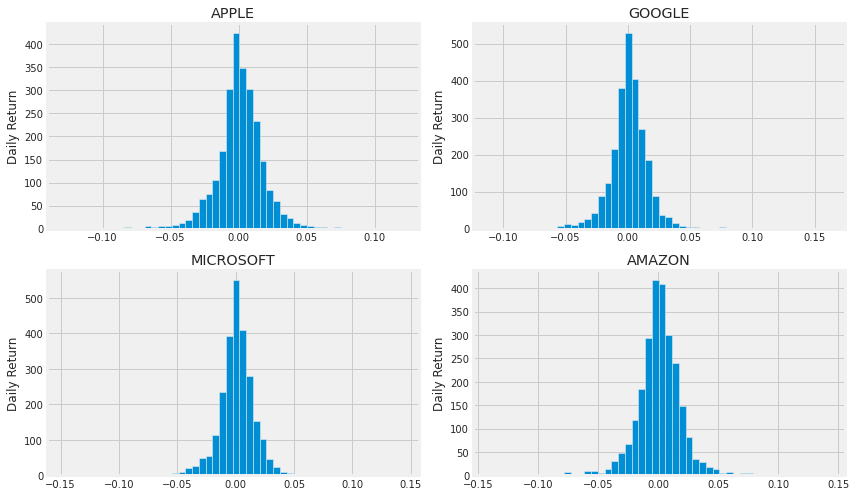

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
from pandas_datareader.data import DataReader

In [ ]:
end = datetime.now()
start = datetime(end.year, end.month - 1, end.day)
closing_df = yf.download(tech_list, start, end)['Adj Close']
closing_df.tail(10)

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-13,147.110001,2261.100098,2330.310059,260.513245
2022-05-16,145.539993,2216.209961,2295.850098,260.892365
2022-05-17,149.240005,2307.370117,2334.030029,266.200012
2022-05-18,140.820007,2142.250000,2248.020020,254.080002
2022-05-19,137.350006,2146.379883,2214.909912,253.139999
2022-05-20,137.589996,2151.820068,2186.260010,252.559998
2022-05-23,143.110001,2151.139893,2233.330078,260.649994
2022-05-24,140.360001,2082.000000,2118.520020,259.619995
2022-05-25,140.520004,2135.500000,2116.790039,262.519989


In [ ]:
stock_change=closing_df.apply(lambda x: np.log(x)-np.log(x.shift(1)))
stock_change.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-27,NaN,NaN,NaN,NaN
2022-04-28,0.044166,0.045484,0.037465,0.022380
2022-04-29,-0.037292,-0.151398,-0.037935,-0.042711
2022-05-02,0.001965,0.001757,0.018874,0.024735
2022-05-03,0.009577,-0.001982,0.008267,-0.009501


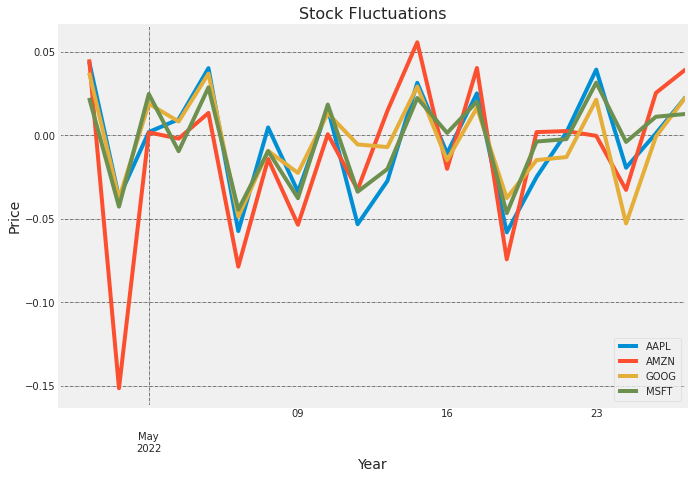

In [ ]:
stock_change.plot(figsize=(10, 7))
plt.legend()
plt.title("Stock Fluctuations", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

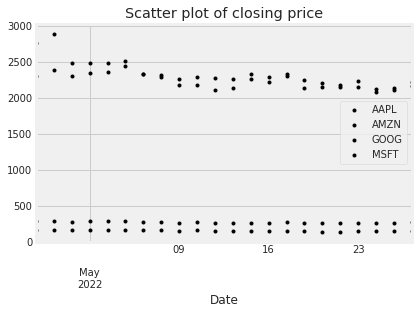

In [ ]:
closing_df.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-27,NaN,NaN,NaN,NaN
2022-04-28,0.045155,0.046534,0.038176,0.022633
2022-04-29,-0.036605,-0.140494,-0.037224,-0.041812
2022-05-02,0.001966,0.001758,0.019053,0.025043
2022-05-03,0.009623,-0.001980,0.008301,-0.009456


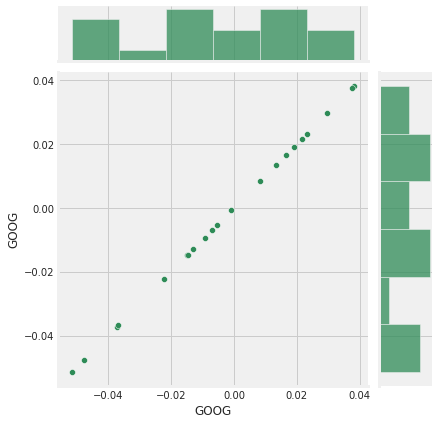

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen');

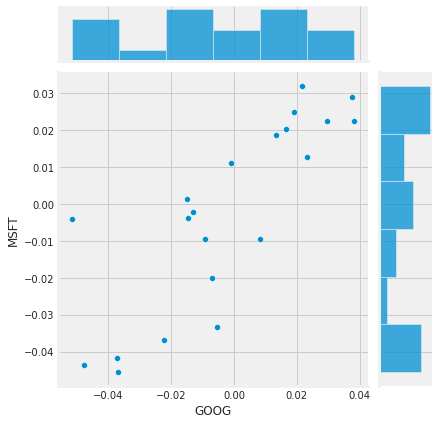

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter');

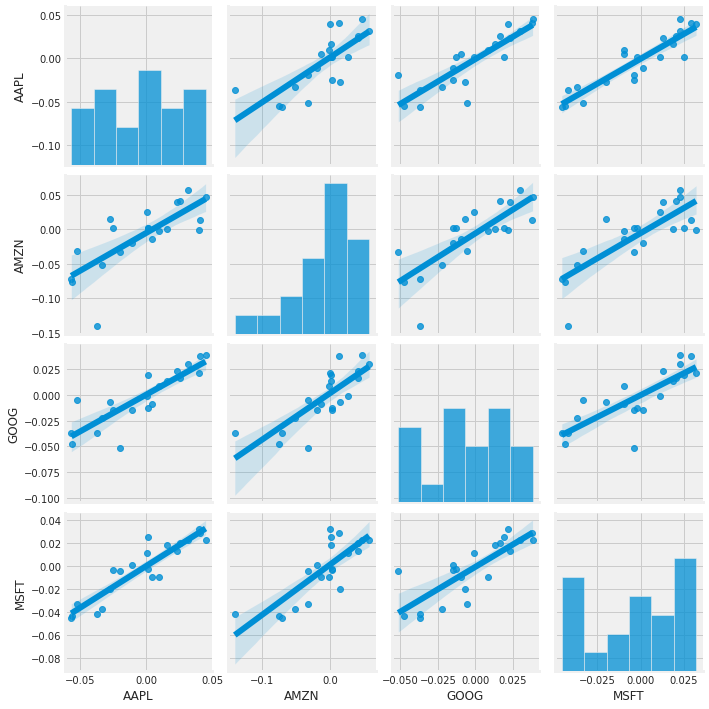

In [ ]:
sns.pairplot(tech_rets, kind='reg');

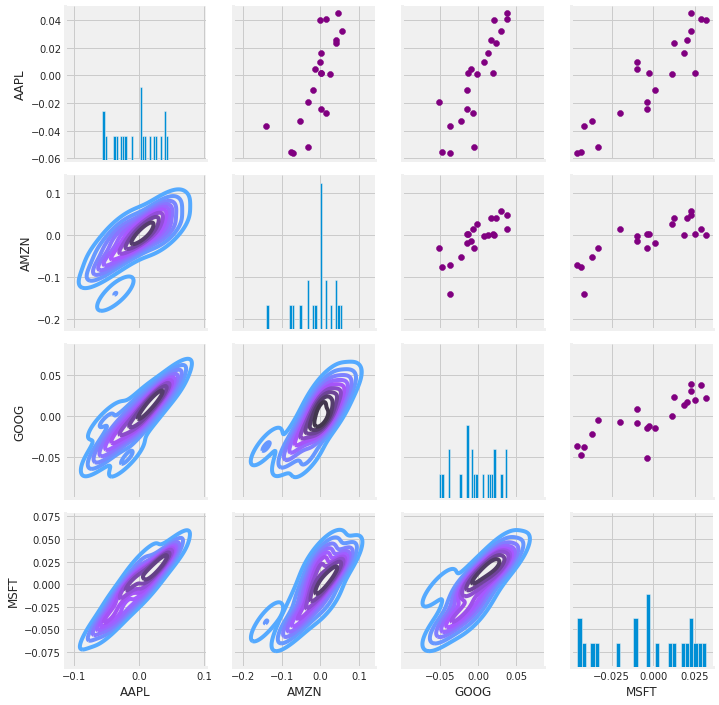

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30);

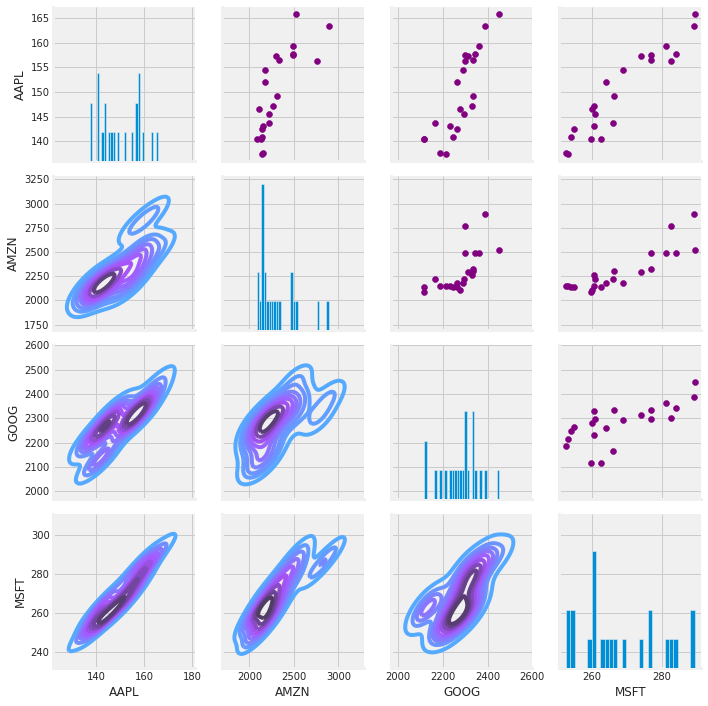

In [ ]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

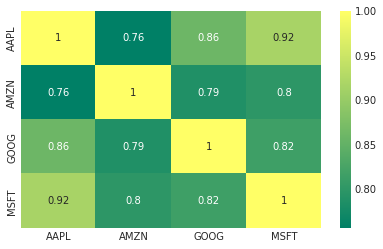

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer');

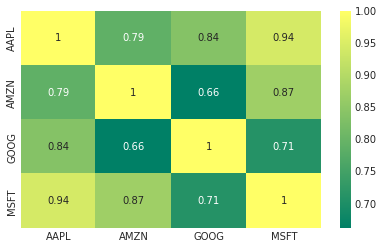

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer');

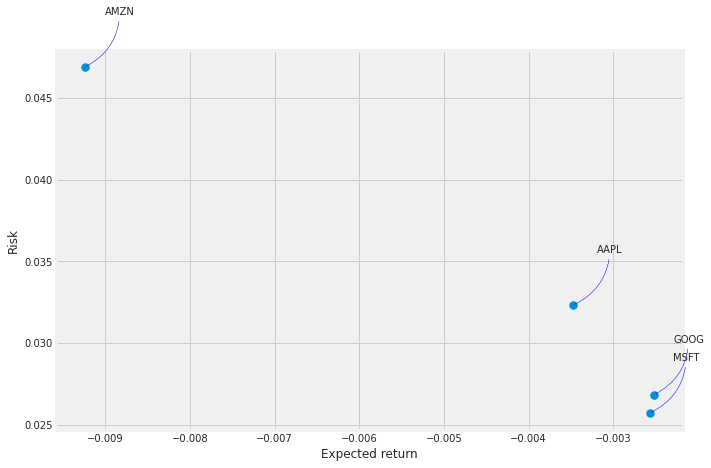

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

MODELLING

In [ ]:
aapl_df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624950,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765112,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898555,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878094,394024400
...,...,...,...,...,...,...
2022-05-20,139.089996,140.699997,132.610001,137.589996,137.589996,137194600
2022-05-23,137.789993,143.259995,137.649994,143.110001,143.110001,117726300
2022-05-24,140.809998,141.970001,137.330002,140.360001,140.360001,104132700


In [ ]:
aapl_df_close = aapl_df.filter(['Close'])
aapl_df_close

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-05-20,137.589996
2022-05-23,143.110001
2022-05-24,140.360001


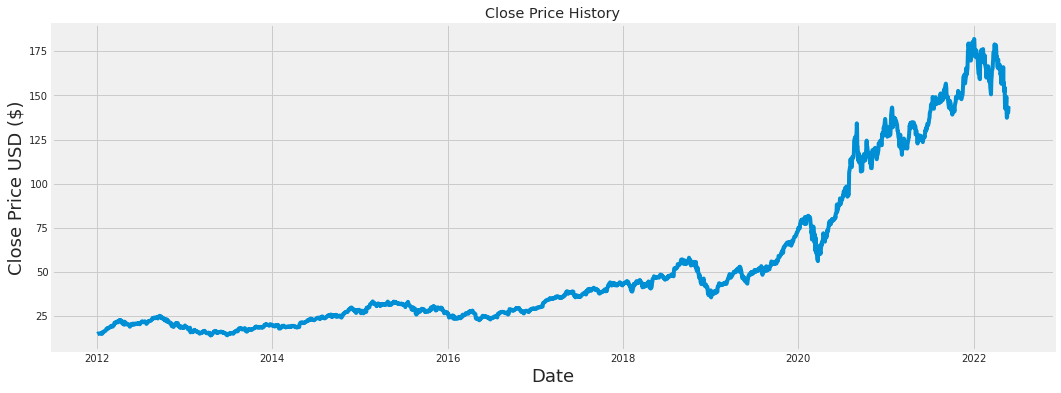

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(aapl_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = aapl_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2488

1)LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.75217556],
       [0.75312761],
       [0.77252512]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2428/2428 [==============================] - 97s 38ms/step - loss: 0.0011


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.856758455035822

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


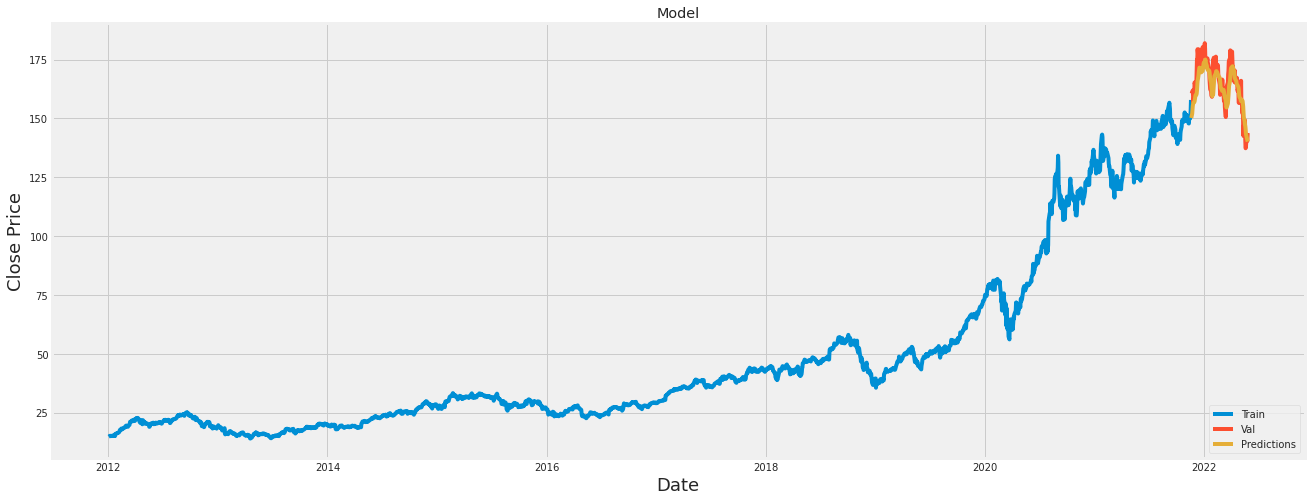

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-11-19,160.550003,150.214050
2021-11-22,161.020004,152.013763
2021-11-23,161.410004,153.806290
2021-11-24,161.940002,155.380722
2021-11-26,156.809998,156.692627
...,...,...
2022-05-20,137.589996,143.607010
2022-05-23,143.110001,141.809738
2022-05-24,140.360001,141.087326


2) ARIMA

In [ ]:
aapl_df1 = yf.download('AAPL', start='2012-01-01', end=datetime.now())
aapl_df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557466,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624948,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765115,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878096,394024400
...,...,...,...,...,...,...
2022-05-20,139.089996,140.699997,132.610001,137.589996,137.589996,137194600
2022-05-23,137.789993,143.259995,137.649994,143.110001,143.110001,117726300
2022-05-24,140.809998,141.970001,137.330002,140.360001,140.360001,104132700


In [ ]:
aapl_df1_close = aapl_df1.filter(['Close'])
aapl_df1_close

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-05-20,137.589996
2022-05-23,143.110001
2022-05-24,140.360001


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
aapl_df1_close.isnull().sum()

Close    0
dtype: int64

In [ ]:
stockprice_forecast =aapl_df1_close['Close'].resample('MS').mean()
stockprice_forecast['2017']

Date
2017-01-01    29.892500
2017-02-01    33.428552
2017-03-01    35.154457
2017-04-01    35.721710
2017-05-01    38.056932
2017-06-01    36.957840
2017-07-01    37.074875
2017-08-01    39.755326
2017-09-01    39.402125
2017-10-01    39.454318
2017-11-01    43.101548
2017-12-01    42.972875
Freq: MS, Name: Close, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(stockprice_forecast)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.689016
p-value: 0.989616


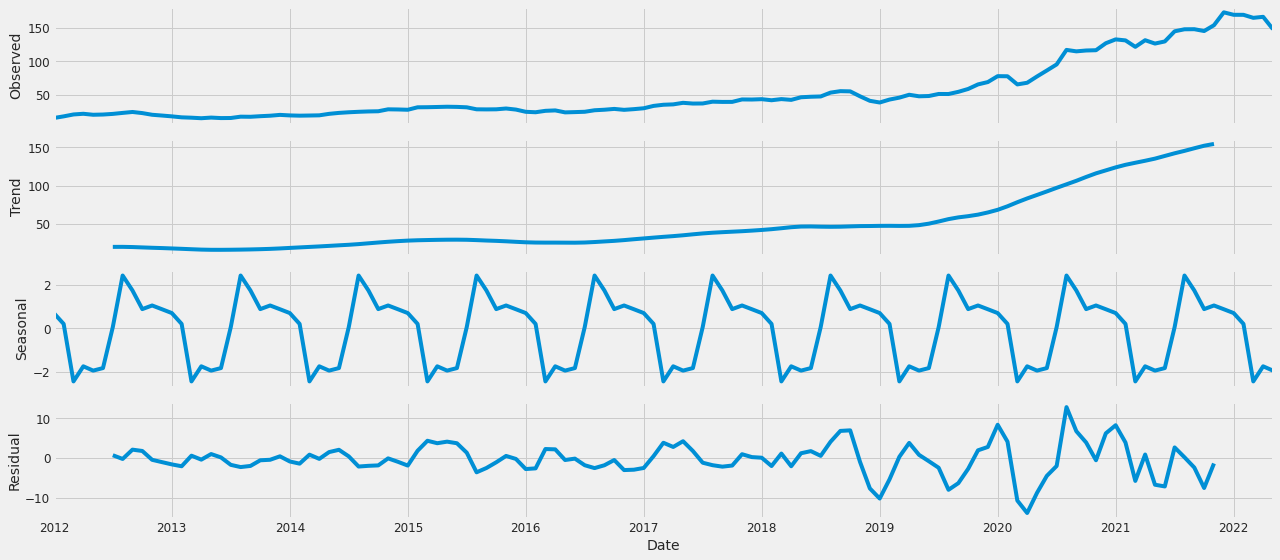

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(stockprice_forecast, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(stockprice_forecast, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1406.080467588596
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1184.941366273371
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1031.022903548781
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:890.8936918506864
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:930.2221151043128
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:916.1445583399466
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:888.5365347686823
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:861.8617375863446
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1239.4808171627235
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1039.208456805909
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:895.3687664048332
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:789.1376270454712
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:827.9146133150543


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:818.7699204476949
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:794.9803663140815
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:764.7847983589402
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:739.4397593286262
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:673.6693174726903
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:699.1826161384197
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:613.5735081627472
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:676.9584662796095
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:673.6691895757125
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:620.3213624697779
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:615.9286546695903
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:731.0147165546325
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:667.1912232282932
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:693.6871061442155
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:608.4937412042547
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:675.8775402064716
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:667.5692829046907
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:620.3736229372184
ARIMA(0, 1

In [ ]:
bestfit = sm.tsa.statespace.SARIMAX(stockprice_forecast, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = bestfit.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3525      0.336     -1.051      0.293      -1.010       0.305
ma.L1          0.5274      0.310      1.703      0.089      -0.080       1.135
ar.S.L12      -0.5255      0.067     -7.837      0.000      -0.657      -0.394
sigma2        27.2485      2.821      9.660      0.000      21.720      32.777


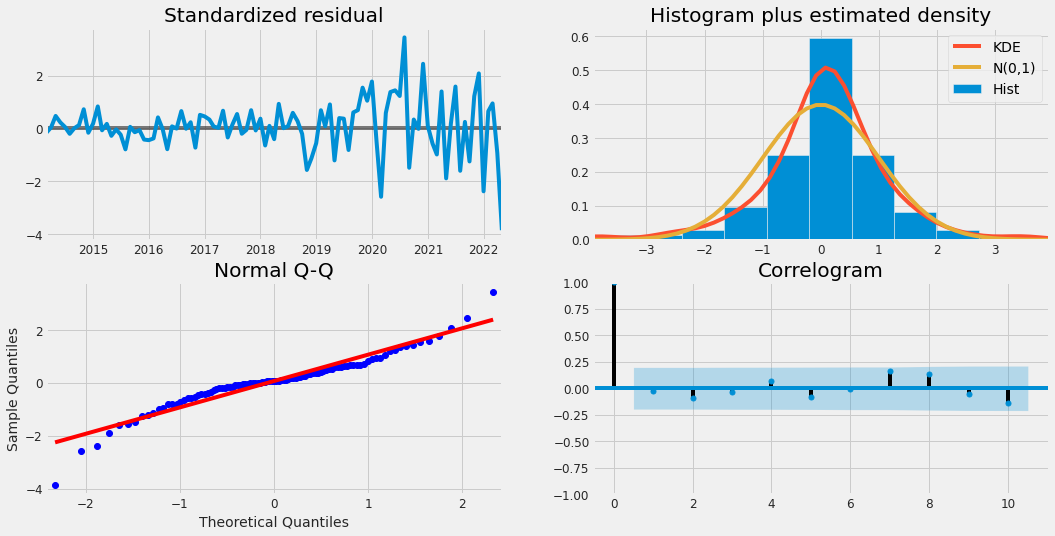

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
stockprice_forecast_forecasted = predi.predicted_mean
stockprice_forecast_truth = stockprice_forecast['2017-01-01':]
mse = ((stockprice_forecast_forecasted - stockprice_forecast_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#Verifying the root mean squared error of our model
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 73.34
The Root Mean Squared Error of our forecasts is 8.56


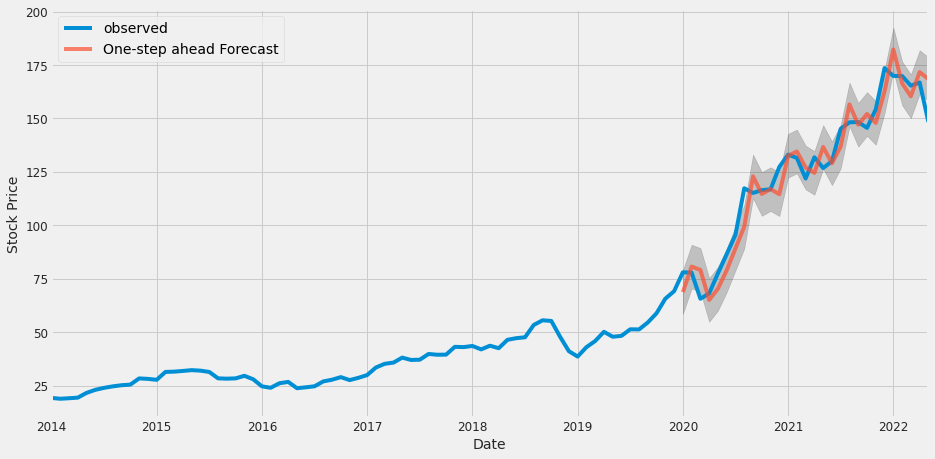

In [ ]:
predi = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
predi_ci = predi.conf_int()
ax = stockprice_forecast['2014':].plot(label='observed')
predi.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(predi_ci.index, predi_ci.iloc[:, 0], predi_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
stockprice_forecast_forecasted = predi.predicted_mean
stockprice_forecast_truth = stockprice_forecast['2017-01-01':]
mse = ((stockprice_forecast_forecasted - stockprice_forecast_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#Verifying the root mean squared error of our model
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 73.34
The Root Mean Squared Error of our forecasts is 8.56


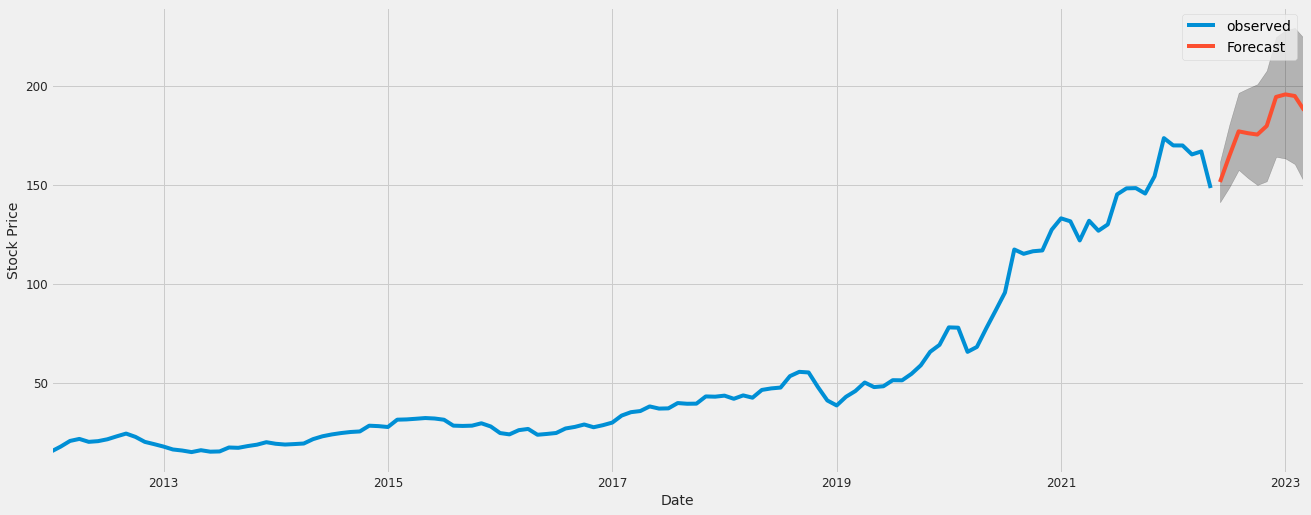

In [ ]:
predi_uc = results.get_forecast(steps=10)
predi_ci = predi_uc.conf_int()
ax = stockprice_forecast.plot(label='observed', figsize=(20, 8))
predi_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predi_ci.index,
                predi_ci.iloc[:, 0],
                predi_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()